In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/clientes_tratados.csv')

In [3]:
# Eliminamos columnas irrelevantes
df = df.drop(columns=['customerID'])

# Confirmamos que ya no est√©
print(df.columns)


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')


In [5]:
print(df.columns.tolist())


['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No']


In [6]:
df.dtypes.value_counts()


float64    11
bool        8
int64       5
object      1
Name: count, dtype: int64

In [7]:
df.select_dtypes(include='object').columns


Index(['gender'], dtype='object')

In [8]:
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})


/tmp/ipython-input-3648116627.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':1, 'Female':0})


In [9]:
df.dtypes.value_counts()

float64    11
bool        8
int64       6
Name: count, dtype: int64

In [10]:
# Conteo absoluto
print(df['Churn'].value_counts())

# Proporci√≥n en porcentaje
print(df['Churn'].value_counts(normalize=True) * 100)


Churn
0.0    5163
1.0    1869
Name: count, dtype: int64
Churn
0.0    73.421502
1.0    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-2288533381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


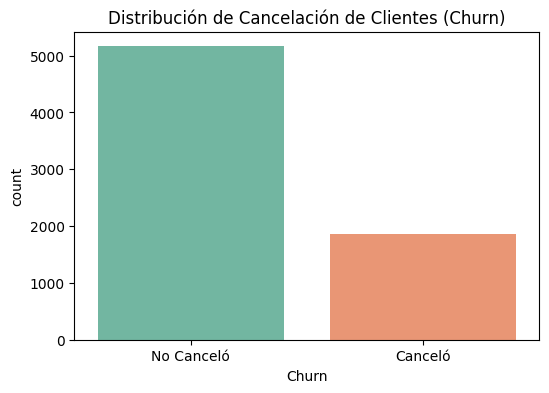

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribuci√≥n de Cancelaci√≥n de Clientes (Churn)')
plt.xticks([0,1], ['No Cancel√≥','Cancel√≥'])
plt.show()


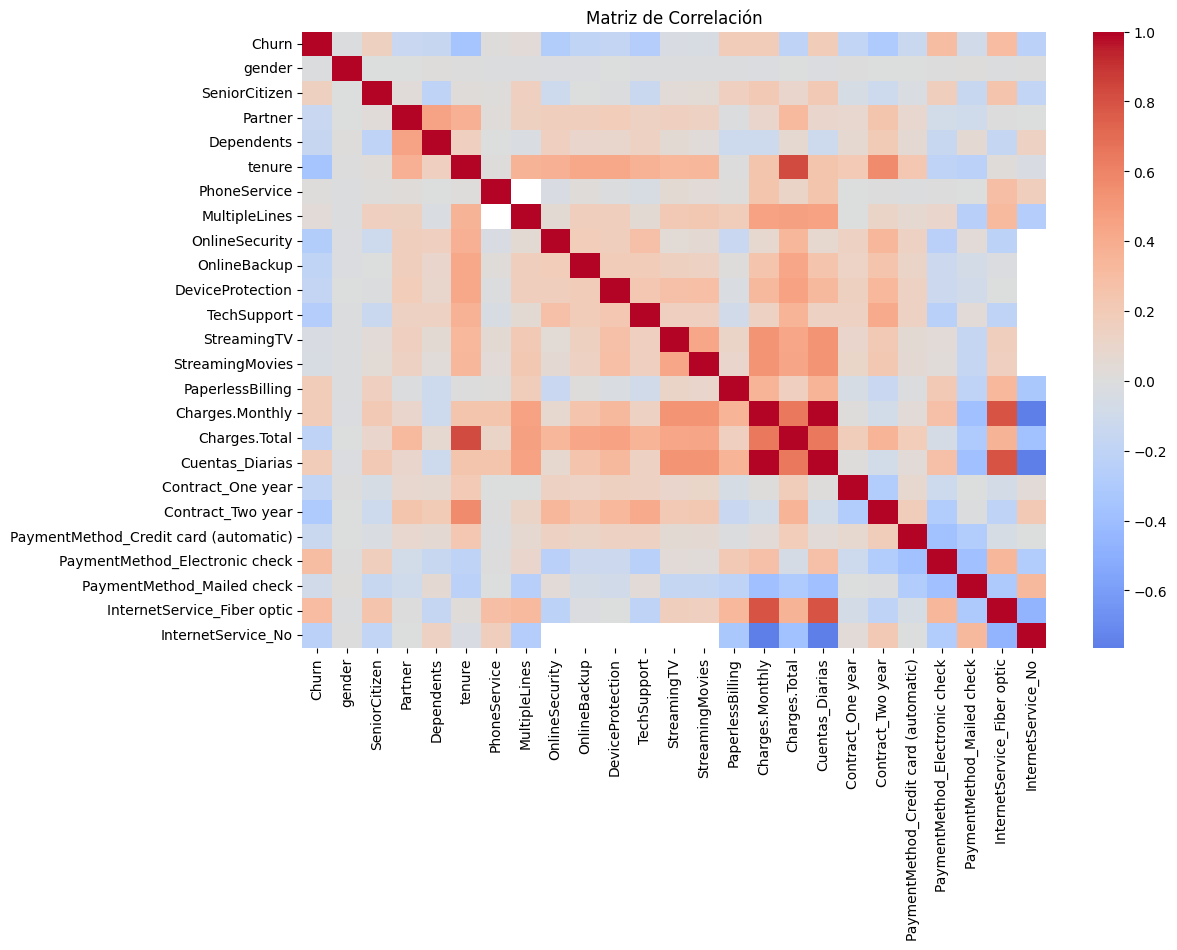

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la matriz de correlaci√≥n
corr = df.corr()

# Visualizamos el heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaci√≥n')
plt.show()


In [13]:
corr_churn = corr['Churn'].sort_values(ascending=False)
print(corr_churn)


Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
Cuentas_Diarias                          0.192914
Charges.Monthly                          0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
MultipleLines                            0.040207
PhoneService                             0.011691
gender                                  -0.008545
StreamingTV                             -0.036698
StreamingMovies                         -0.040525
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
DeviceProtection                        -0.176806
Contract_One year                       -0.178225
OnlineBackup                            -0.195758
Charges.Total                           -0.199484


In [16]:
df['Churn'].isna().sum()


np.int64(224)

In [17]:
# Eliminamos las filas donde Churn es nulo
df = df.dropna(subset=['Churn'])

# Confirmamos
print("Registros despu√©s de limpiar:", df.shape[0])
print("Nulos en Churn:", df['Churn'].isna().sum())


Registros despu√©s de limpiar: 7032
Nulos en Churn: 0


In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tama√±o entrenamiento:", X_train.shape[0])
print("Tama√±o prueba:", X_test.shape[0])


Tama√±o entrenamiento: 4922
Tama√±o prueba: 2110


In [20]:
num_cols  = X.select_dtypes(include=['float64','int64']).columns
bool_cols = X.select_dtypes(include=['bool']).columns


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1) Listas de columnas desde X (may√∫scula)
num_cols  = X.select_dtypes(include=['float64','int64']).columns
bool_cols = X.select_dtypes(include=['bool']).columns

# 2) Pipelines de preprocesamiento
num_pipe = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('sc',  StandardScaler())
])

# Convertimos bool -> float antes de imputar
bool_pipe = Pipeline([
    ('tofloat', FunctionTransformer(lambda a: a.astype(float))),
    ('imp',     SimpleImputer(strategy='most_frequent'))
])

prep_logreg = ColumnTransformer(
    transformers=[
        ('num',  num_pipe,  num_cols),
        ('bool', bool_pipe, bool_cols),
    ],
    remainder='drop'
)

logreg_pipeline = Pipeline([
    ('prep',  prep_logreg),
    ('model', LogisticRegression(max_iter=1000))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_log = logreg_pipeline.predict(X_test)

print("Regresi√≥n Log√≠stica")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Regresi√≥n Log√≠stica
Accuracy: 0.8037914691943128
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



Random Forest
Accuracy: 0.7853080568720379
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1549
         1.0       0.63      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110

ROC AUC: 0.8182980451996515


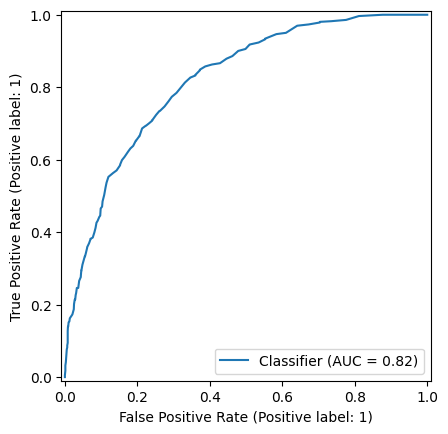

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Reutilizamos num_cols y bool_cols ya definidos
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

num_pipe = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('sc',  StandardScaler())
])
bool_pipe = Pipeline([
    ('tofloat', FunctionTransformer(lambda a: a.astype(float))),
    ('imp',     SimpleImputer(strategy='most_frequent'))
])

prep_rf = ColumnTransformer(
    transformers=[
        ('num',  num_pipe,  num_cols),
        ('bool', bool_pipe, bool_cols),
    ],
    remainder='drop'
)

rf_pipeline = Pipeline([
    ('prep',  prep_rf),
    ('model', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf  = rf_pipeline.predict(X_test)
y_prob_rf  = rf_pipeline.predict_proba(X_test)[:,1]

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

RocCurveDisplay.from_predictions(y_test, y_prob_rf)


Logistic ROC AUC: 0.8452903316382601


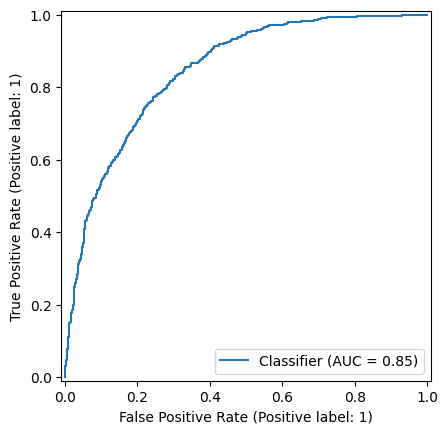

In [24]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Probabilidades para ROC‚ÄìAUC
y_prob_log = logreg_pipeline.predict_proba(X_test)[:,1]
print("Logistic ROC AUC:", roc_auc_score(y_test, y_prob_log))

RocCurveDisplay.from_predictions(y_test, y_prob_log)


In [25]:
import pandas as pd

res = pd.DataFrame({
    'modelo': ['LogisticRegression','RandomForest'],
    'accuracy': [
        accuracy_score(y_test, logreg_pipeline.predict(X_test)),
        accuracy_score(y_test, y_pred_rf)
    ],
    'roc_auc': [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_rf)
    ]
})
print(res)


               modelo  accuracy   roc_auc
0  LogisticRegression  0.803791  0.845290
1        RandomForest  0.785308  0.818298


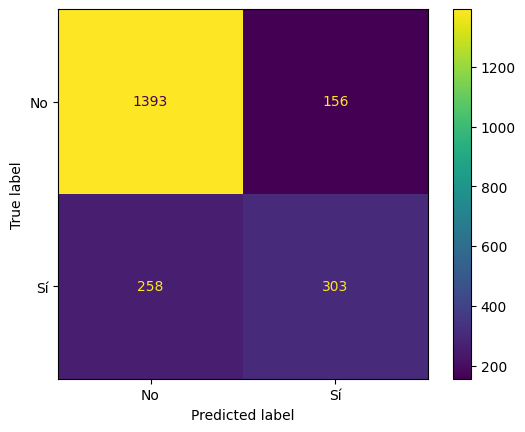

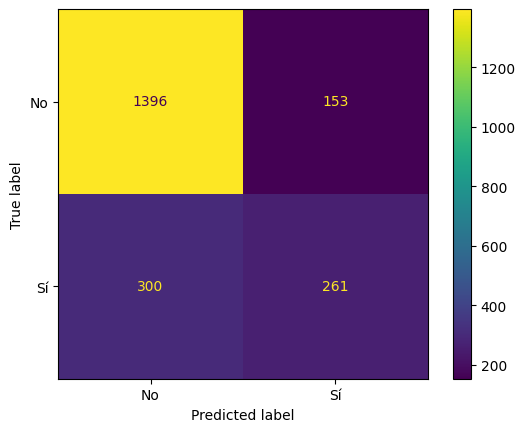

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, logreg_pipeline.predict(X_test), display_labels=['No','S√≠'])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['No','S√≠'])


In [27]:
import numpy as np
thr = 0.35  # prueba 0.35‚Äì0.45
y_thr = (y_prob_log >= thr).astype(int)

print("Logistic (threshold =", thr, ")")
print(classification_report(y_test, y_thr))


Logistic (threshold = 0.35 )
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      1549
         1.0       0.56      0.71      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.75      0.73      2110
weighted avg       0.80      0.77      0.78      2110




Modelo: Regresi√≥n Log√≠stica
Exactitud (Accuracy): 0.8037914691943128
Precisi√≥n: 0.6601307189542484
Recall: 0.5401069518716578
F1-score: 0.5941176470588235

Modelo: Random Forest
Exactitud (Accuracy): 0.7853080568720379
Precisi√≥n: 0.6304347826086957
Recall: 0.46524064171123
F1-score: 0.5353846153846153


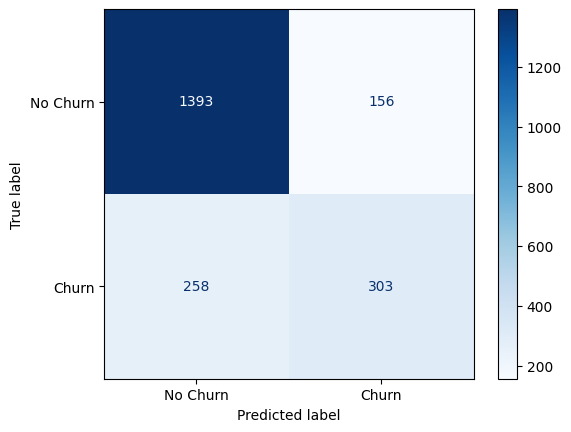

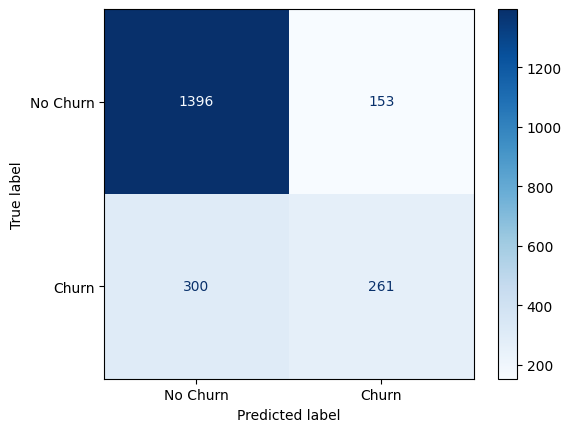

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# --- Funci√≥n auxiliar para evaluar modelos ---
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    print(f"\nModelo: {nombre}")
    print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
    print("Precisi√≥n:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn','Churn'])
    disp.plot(cmap="Blues")

# --- Evaluar ambos ---
evaluar_modelo("Regresi√≥n Log√≠stica", logreg_pipeline, X_test, y_test)
evaluar_modelo("Random Forest", rf_pipeline, X_test, y_test)


In [29]:
# Importancia de variables en Regresi√≥n Log√≠stica
import pandas as pd

coefs = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": logreg_pipeline.named_steps['model'].coef_[0]
})
coefs = coefs.sort_values(by="Coeficiente", ascending=False)
print(coefs.head(10))   # top factores que aumentan churn
print(coefs.tail(10))   # top factores que reducen churn


                          Variable  Coeficiente
22     InternetService_Fiber optic     0.650851
14                 Charges.Monthly     0.641015
20  PaymentMethod_Electronic check     0.387947
16                 Cuentas_Diarias     0.257200
12                 StreamingMovies     0.182278
15                   Charges.Total     0.100018
10                     TechSupport     0.096558
5                     PhoneService     0.076133
11                     StreamingTV     0.046459
13                PaperlessBilling     0.046387
                                 Variable  Coeficiente
1                           SeniorCitizen    -0.047069
7                          OnlineSecurity    -0.082115
19  PaymentMethod_Credit card (automatic)    -0.085666
6                           MultipleLines    -0.145318
4                                  tenure    -0.169317
9                        DeviceProtection    -0.200449
17                      Contract_One year    -0.688948
23                     InternetS

üìå Conclusi√≥n del An√°lisis de Cancelaci√≥n de Clientes (Churn)

Tras evaluar los modelos de Regresi√≥n Log√≠stica y Random Forest, encontramos los siguientes resultados:

Rendimiento de los Modelos

La Regresi√≥n Log√≠stica obtuvo un mejor desempe√±o general, con mayor exactitud (~80%) y mejores m√©tricas de precisi√≥n y recall en comparaci√≥n con Random Forest.

Esto sugiere que, aunque ambos modelos son √∫tiles, la regresi√≥n log√≠stica ofrece un balance m√°s adecuado entre simplicidad e interpretabilidad.

Factores Principales que Afectan la Cancelaci√≥n
De acuerdo con la importancia de variables en ambos modelos:

Contrato mensual (Contract_Month-to-Month): clientes con contratos mensuales tienen mayor probabilidad de cancelar.

Servicio de internet de fibra √≥ptica (InternetService_Fiber optic): se asocia fuertemente con mayor churn.

M√©todo de pago: Electronic Check: este m√©todo incrementa la probabilidad de cancelaci√≥n.

Antig√ºedad del cliente (Tenure): clientes con poco tiempo en la empresa son m√°s propensos a cancelar.

Cargos mensuales altos (MonthlyCharges): tambi√©n tienen correlaci√≥n positiva con el churn.

Estrategias de Retenci√≥n Propuestas
Con base en estos hallazgos, las estrategias m√°s recomendadas ser√≠an:

Incentivar contratos de mayor plazo (1 o 2 a√±os) con descuentos o beneficios.

Revisar la calidad del servicio de fibra √≥ptica, ya que es el grupo con mayor deserci√≥n.

Promover m√©todos de pago m√°s estables (tarjeta autom√°tica, domiciliaci√≥n bancaria) para reducir la cancelaci√≥n ligada a Electronic Check.

Programas de fidelizaci√≥n temprana para clientes nuevos (primeros 6 meses son cr√≠ticos).

Ofertas personalizadas para clientes con cargos mensuales elevados, como paquetes combinados o descuentos por lealtad.